In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

sns.set_palette('husl')

In [3]:
df = pd.read_pickle('data/processed.pickle')
df.head()

,key,title,authors,abstract,year_published,tags,category,skills,skill_cat,types,lang_family
0,rayyan-354359269,An experience of automated assessment in a lar...,"Zampirolli F.A., Borovina Josko J.M., Venero M...",The 2020 pandemic imposed new demands on teach...,2021,"[data_available:False, technique:pre_defined_q...",[dynamic],[correctness],[correctness_dynamic],"[description, evaluation]",[OOP]
1,rayyan-354359270,Semiautomatic generation and assessment of Jav...,"Insa D., Pérez S., Silva J., Tamarit S.",Continuous assessment is essential in educatio...,2021,"[skill:correctness, tool:javassess, interactio...","[dynamic, static]",[correctness],"[correctness_dynamic, correctness_static]","[description, evaluation]",[OOP]
2,rayyan-354359271,A tool for evaluating computer programs from s...,"Vaneck Q., Colart T., Frénay B., Vanderose B.",Computer science studies are more and more pop...,2021,"[data_available:False, tool:pylint, language:p...",[static],"[readability, maintainability]","[readability_static, maintainability_static]",[description],[OOP]
3,rayyan-354359272,Virtual Teaching Assistant for Grading Program...,"Chou C.-Y., Chen Y.-J.",This study proposes an automated programming a...,2021,"[data_available:False, skill:correctness, inte...","[dynamic, static]",[correctness],"[correctness_dynamic, correctness_static]","[description, evaluation]",[Unknown]
4,rayyan-354359273,Analysis of an automatic grading system within...,"Hegarty-Kelly E., Mooney D.A.",Reliable and pedagogically sound automated fee...,2021,"[data_available:False, skill:correctness, inte...","[dynamic, static]",[correctness],"[correctness_dynamic, correctness_static]","[description, evaluation]",[OOP]


# Meta-Data
### Years Published

In [4]:
count_years = df.year_published.value_counts().reset_index().rename(columns={'index': 'year_published', 'year_published': 'no_published'})
count_years.head()

,year_published,no_published
0,2020,28
1,2021,27
2,2019,25
3,2018,21
4,2017,20


In [5]:
count_years.no_published.sum()

121

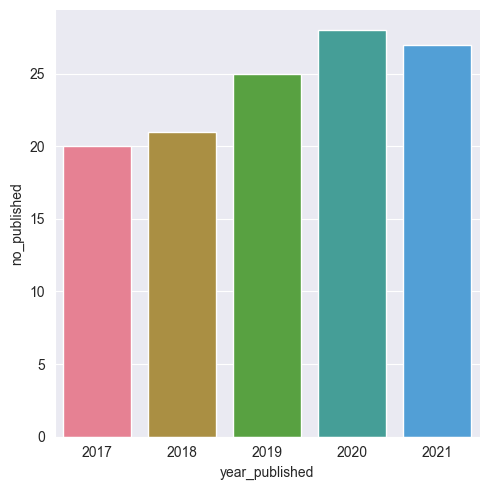

In [6]:
sns.catplot(count_years, kind='bar', x='year_published', y='no_published')
plt.savefig('plots/years_published.pdf')

## Paper Types

In [7]:
# Scaling up Functional Programming Education: Under the Hood of the OCaml MOOC

paper_types = pd.Series([paper_type for paper_type in df.types]).value_counts().reset_index()
paper_types.columns = ["paper_type", 'no_type']
paper_types['proportion'] = (paper_types.no_type / paper_types.no_type.sum()) * 100
paper_types.paper_type = paper_types.paper_type.astype(str)
paper_types

,paper_type,no_type,proportion
0,"['description', 'evaluation']",82,67.768595
1,['evaluation'],17,14.049587
2,['description'],11,9.090909
3,['experience'],11,9.090909


In [8]:
paper_types.no_type.sum()

121

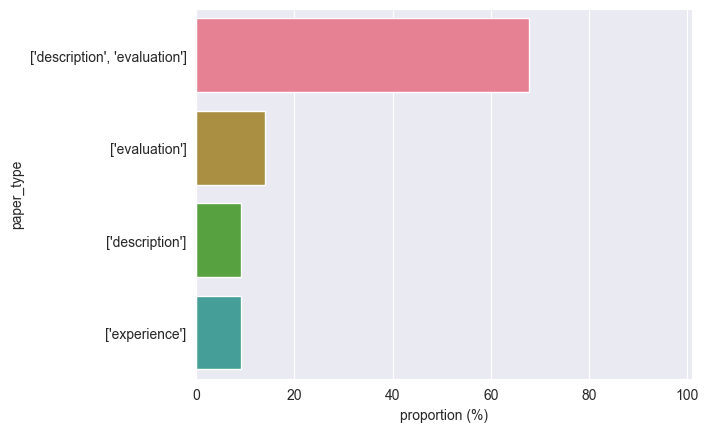

In [9]:
ax_type = sns.barplot(paper_types, y='paper_type', x='proportion')
ax_type.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/paper_types.pdf', bbox_inches='tight')

## Degree of Automation

In [10]:
auto = pd.Series([tag.replace('approach:', '') for tags in df.tags for tag in tags if tag.startswith('approach')]).value_counts().reset_index()
auto.columns = ["degree_of_automation", 'number']
auto['proportion'] = (auto.number / auto.number.sum()) * 100
auto.head()

,degree_of_automation,number,proportion
0,fully_automated,99,81.818182
1,semi_automatic,17,14.049587
2,unclear,5,4.132231


In [11]:
auto.number.sum()

121

In [12]:
pd.concat([df.title, df.tags.apply(lambda labels: [label for label in labels if 'approach' in label])], axis=1)

,title,tags
0,An experience of automated assessment in a lar...,[approach:fully_automated]
1,Semiautomatic generation and assessment of Jav...,[approach:semi_automatic]
2,A tool for evaluating computer programs from s...,[approach:fully_automated]
3,Virtual Teaching Assistant for Grading Program...,[approach:semi_automatic]
4,Analysis of an automatic grading system within...,[approach:fully_automated]
...,...,...
116,Automated data-driven hints for computer progr...,[approach:fully_automated]
117,Learning and teaching numerical methods with a...,[approach:fully_automated]
118,Ask-Elle: an Adaptable Programming Tutor for H...,[approach:fully_automated]
119,An AI system for coaching novice programmers,[approach:fully_automated]


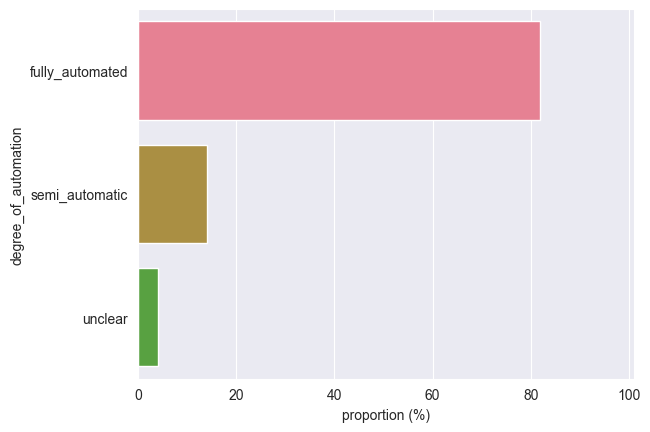

In [13]:
ax_doa = sns.barplot(auto, y='degree_of_automation', x='proportion')
ax_doa.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/auto_degree.pdf', bbox_inches='tight')

## Interaction type

In [14]:
inter = pd.Series([tag.replace('interaction:', '') for tags in df.tags for tag in tags if tag.startswith('interaction')]).value_counts().reset_index()
inter.columns = ["interaction", 'number']
inter['proportion'] = (inter.number / inter.number.sum()) * 100
inter.head()

,interaction,number,proportion
0,unknown,50,41.322314
1,multiple,50,41.322314
2,single,18,14.876033
3,none,3,2.479339


In [15]:
inter.number.sum()

121

In [16]:
pd.concat([df.title, df.tags.apply(lambda labels: [label for label in labels if 'interaction' in label])], axis=1)

,title,tags
0,An experience of automated assessment in a lar...,[interaction:unknown]
1,Semiautomatic generation and assessment of Jav...,[interaction:unknown]
2,A tool for evaluating computer programs from s...,[interaction:unknown]
3,Virtual Teaching Assistant for Grading Program...,[interaction:multiple]
4,Analysis of an automatic grading system within...,[interaction:unknown]
...,...,...
116,Automated data-driven hints for computer progr...,[interaction:multiple]
117,Learning and teaching numerical methods with a...,[interaction:multiple]
118,Ask-Elle: an Adaptable Programming Tutor for H...,[interaction:multiple]
119,An AI system for coaching novice programmers,[interaction:unknown]


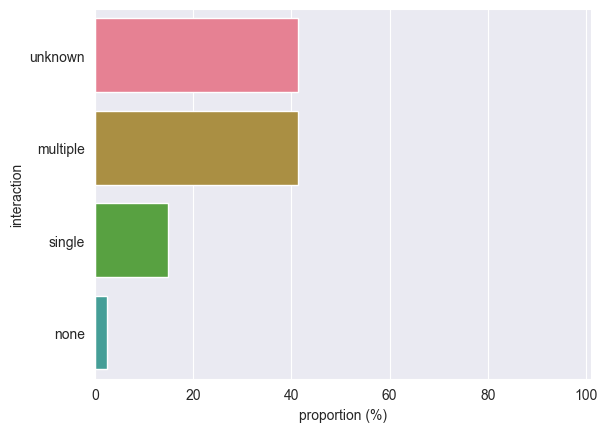

In [17]:
ax_int = sns.barplot(inter, y='interaction', x='proportion')
ax_int.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/interaction.pdf', bbox_inches='tight')

# Skill-Category Complete Mapping
## 1D Plots

In [18]:
skill_cat_count = df.skill_cat.value_counts().reset_index()
skill_cat_count.columns = ["skill_cat", 'number']
skill_cat_count['proportion'] = (skill_cat_count.number / skill_cat_count.number.sum()) * 100
skill_cat_count.skill_cat = skill_cat_count.skill_cat.astype(str)
skill_cat_count.head()

,skill_cat,number,proportion
0,['correctness_dynamic'],40,33.057851
1,"['correctness_dynamic', 'correctness_static']",21,17.355372
2,['correctness_static'],17,14.049587
3,"['readability_static', 'correctness_dynamic']",11,9.090909
4,"['readability_static', 'maintainability_static']",4,3.305785


In [19]:
skill_cat_count.number.sum()

121

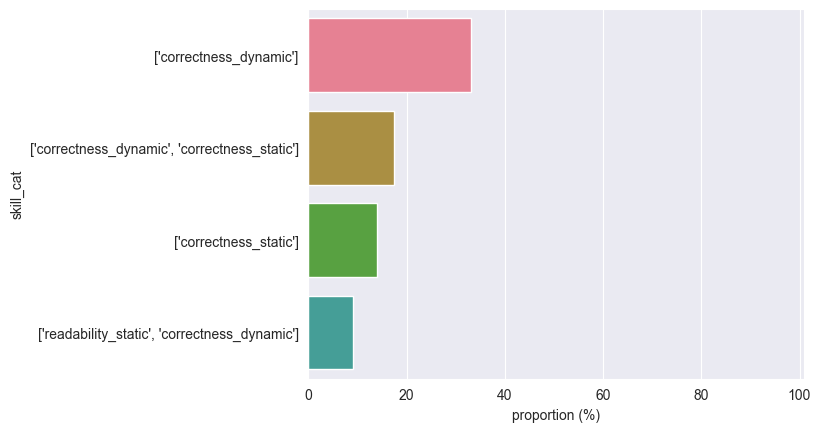

In [20]:
ax_skill_cat = sns.barplot(skill_cat_count[skill_cat_count.number > 5], y='skill_cat', x='proportion')
ax_skill_cat.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/skill_cat.pdf', bbox_inches='tight')

In [21]:
skill_cat_exp = df.explode('skill_cat').skill_cat.value_counts().reset_index()
skill_cat_exp.columns = ["skill_cat", 'number']
skill_cat_exp['proportion'] = (skill_cat_exp.number / skill_cat_exp.number.sum()) * 100
skill_cat_exp.head()

,skill_cat,number,proportion
0,correctness_dynamic,82,45.555556
1,correctness_static,47,26.111111
2,readability_static,28,15.555556
3,maintainability_static,11,6.111111
4,correctness_ml,8,4.444444


In [22]:
skill_cat_exp.number.sum()

180

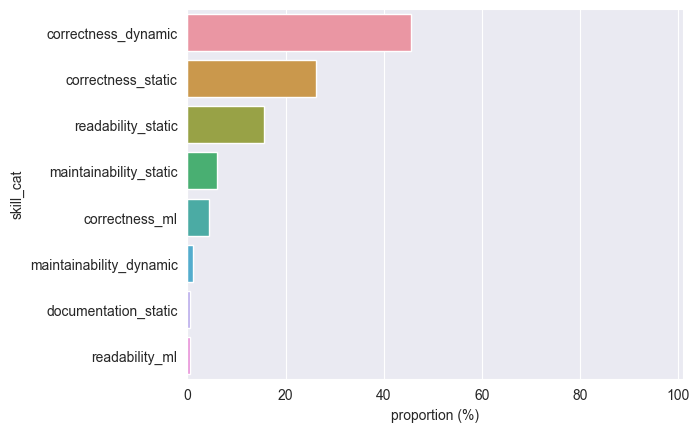

In [23]:
ax_skill_cat_exp = sns.barplot(skill_cat_exp, y='skill_cat', x='proportion')
ax_skill_cat_exp.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/skill_cat_exp.pdf', bbox_inches='tight')

## Skill Category 2D plots

In [24]:
skill_cat_2d = df[['title', 'skill_cat']].explode('skill_cat').copy()
skill_cat_2d.head()

,title,skill_cat
0,An experience of automated assessment in a lar...,correctness_dynamic
1,Semiautomatic generation and assessment of Jav...,correctness_dynamic
1,Semiautomatic generation and assessment of Jav...,correctness_static
2,A tool for evaluating computer programs from s...,readability_static
2,A tool for evaluating computer programs from s...,maintainability_static


In [25]:
split_df = skill_cat_2d.skill_cat.str.split('_', expand=True)
skill_cat_2d_split = pd.concat([skill_cat_2d, split_df],axis=1).drop(columns='skill_cat')
skill_cat_2d_split.columns = ['title', 'skill', 'category']
skill_cat_2d_split.head()

,title,skill,category
0,An experience of automated assessment in a lar...,correctness,dynamic
1,Semiautomatic generation and assessment of Jav...,correctness,dynamic
1,Semiautomatic generation and assessment of Jav...,correctness,static
2,A tool for evaluating computer programs from s...,readability,static
2,A tool for evaluating computer programs from s...,maintainability,static


In [26]:
skill_cat_2d_grp = skill_cat_2d_split.groupby(['skill', 'category']).count().reset_index()
skill_cat_2d_grp.columns = ['skill', 'category', 'number']
skill_cat_2d_grp = skill_cat_2d_grp.sort_values('number', ascending=False)
skill_cat_2d_grp.head()

,skill,category,number
0,correctness,dynamic,82
2,correctness,static,47
7,readability,static,28
5,maintainability,static,11
1,correctness,ml,8


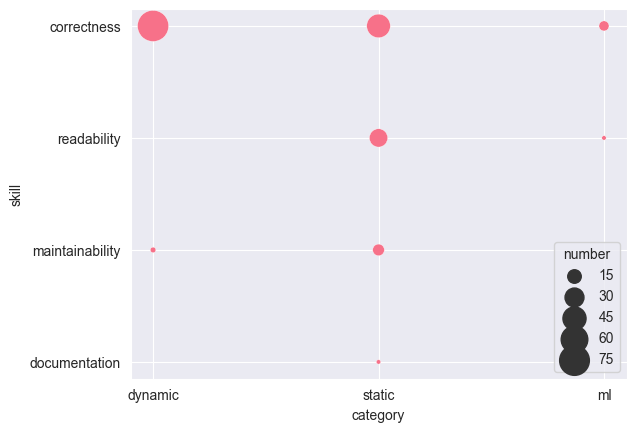

In [69]:
sns.scatterplot(skill_cat_2d_grp, y='skill', x='category', size='number', sizes=(10, 500))
plt.savefig('plots/skill_cat_2d_bubble.pdf', bbox_inches='tight')

### Bipartie

In [28]:
skill_cat_bp = skill_cat_2d_grp.copy()

skill_cat_bp.skill = skill_cat_bp.skill.map(lambda x: x[0])
skill_cat_bp.category = skill_cat_bp.category.map(lambda x: x[:2])

skill_cat_bp

,skill,category,number
0,c,dy,82
2,c,st,47
7,r,st,28
5,m,st,11
1,c,ml,8
4,m,dy,2
3,d,st,1
6,r,ml,1


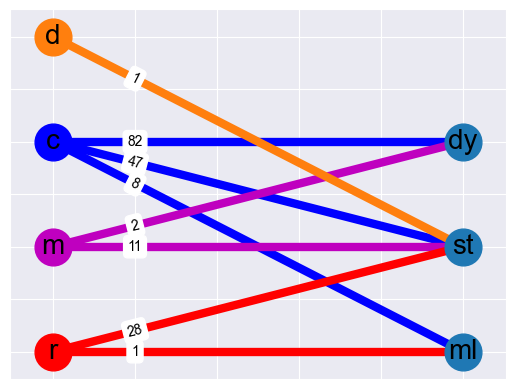

<Figure size 640x480 with 0 Axes>

In [29]:
# Adapted from documentation

B = nx.Graph()
B.add_nodes_from(['c', 'r', 'm', 'd'], bipartite=0)
B.add_nodes_from(['dy', 'st', 'ml'], bipartite=1)

bp_raw = list(skill_cat_bp.itertuples(index=False,name=None))

for e in bp_raw:
    B.add_edge(e[0], e[1], weight=e[2])


# Separate by group
l, r = nx.bipartite.sets(B)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))


# nodes
nx.draw_networkx_nodes(B, pos, node_size=700, nodelist=['c'], node_color='b')
nx.draw_networkx_nodes(B, pos, node_size=700, nodelist=['m'], node_color='m')
nx.draw_networkx_nodes(B, pos, node_size=700, nodelist=['r'], node_color='r')
nx.draw_networkx_nodes(B, pos, node_size=700, nodelist=['d'], node_color='tab:orange')
nx.draw_networkx_nodes(B, pos, node_size=700, nodelist=['ml', 'st', 'dy'])

# edges
e_c = [(u, v) for (u, v, d) in B.edges(data=True) if u == 'c']
e_m = [(u, v) for (u, v, d) in B.edges(data=True) if u == 'm']
e_r = [(u, v) for (u, v, d) in B.edges(data=True) if u == 'r']
e_d = [(u, v) for (u, v, d) in B.edges(data=True) if u == 'd']

nx.draw_networkx_edges(B, pos, width=6, edgelist=e_c, edge_color='b')
nx.draw_networkx_edges(B, pos, width=6, edgelist=e_m, edge_color='m')
nx.draw_networkx_edges(B, pos, width=6, edgelist=e_r, edge_color='r')
nx.draw_networkx_edges(B, pos, width=6, edgelist=e_d, edge_color='tab:orange')

# node labels
nx.draw_networkx_labels(B, pos, font_size=20, font_family="sans-serif")

# edge weight labels
edge_labels = nx.get_edge_attributes(B, "weight")

nx.draw_networkx_edge_labels(B, pos, edge_labels, label_pos=0.8)
plt.show()
plt.savefig('plots/skill_cat_bipartie.png')
# Needs manual class annotation

## Skill Category Over Time
### Skill Category Combined

In [58]:
skill_cat_time = df[['skill_cat', 'year_published']].copy()
skill_cat_time = skill_cat_time.explode('skill_cat')
skill_cat_time.head()

,skill_cat,year_published
0,correctness_dynamic,2021
1,correctness_dynamic,2021
1,correctness_static,2021
2,readability_static,2021
2,maintainability_static,2021


In [89]:
skill_cat_time_grp = skill_cat_time.copy()
skill_cat_time_grp.skill_cat = skill_cat_time_grp.skill_cat.astype(str)
skill_cat_time_grp.year_published = skill_cat_time_grp.year_published.astype(str)
skill_cat_time_grp['cumulative_sum'] = 0
skill_cat_time_grp = skill_cat_time_grp.groupby(['skill_cat', 'year_published']).count().groupby(level=0).cumsum().reset_index()

skill_cat_time_grp.head()

,skill_cat,year_published,cumulative_sum
0,correctness_dynamic,2017,10
1,correctness_dynamic,2018,24
2,correctness_dynamic,2019,38
3,correctness_dynamic,2020,63
4,correctness_dynamic,2021,82


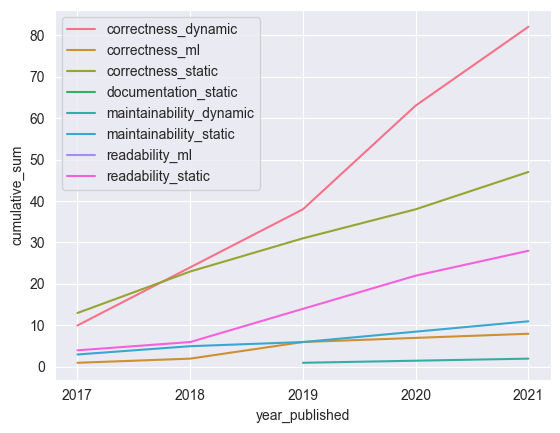

In [90]:
sns.lineplot(skill_cat_time_grp, x='year_published', y='cumulative_sum', hue='skill_cat')
plt.legend(loc='upper left')

# Language

In [ ]:
families = pd.Series([family for family in df.lang_family]).value_counts().reset_index()
families.columns = ["language_paradigm", 'number']
families['proportion'] = (families.number / families.number.sum()) * 100
families.language_paradigm = families.language_paradigm.astype(str)
families

In [ ]:
families.number.sum()

In [ ]:
ax_lang = sns.barplot(families, y='language_paradigm', x='proportion')
ax_lang.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/lang_family.pdf', bbox_inches='tight')

# Grading/Feedback Techniques

In [ ]:
tech_df = pd.Series([tag.replace('technique:', '') for tags in df.tags for tag in tags if tag.startswith('technique')]).value_counts().reset_index()
tech_df.columns = ["technique", 'number']
tech_df['proportion'] = (tech_df.number / tech_df.number.sum()) * 100
tech_df

In [ ]:
def add_cats(tech):
    if tech in ['unit_testing', 'property_based_testing', 'ci', 'output_matching']:
        return 'dynamic'
    if tech in ['pattern_matching', 'static_analysis', 'code_metrics', 'cluster',
                'style_check', 'program_repair', 'rule_based', 'dsl_rules', 'model_solution_req',
                'model_solution_closeness', 'code_repair_for_feedback']:
        return 'static'
    if tech in ['machine_learning', 'misc']:
        return 'other'

In [ ]:
tech_df['category'] = tech_df.technique.apply(lambda tech: add_cats(tech))
tech_df

In [ ]:
tech_df.category.isna().sum()

In [ ]:
tech_df[tech_df.category.isna()]

In [ ]:
tech_df = tech_df.sort_values(by=['category', 'proportion'], ascending=[False, True])

In [ ]:
ax_tech_cat = sns.FacetGrid(tech_df[tech_df.number > 5], hue='category', aspect=3)
ax_tech_cat.map_dataframe(plt.barh, y='technique', width='proportion')

ax_tech_cat.set(xlim=[0, 101], xlabel='proportion (%)')
ax_tech_cat.add_legend()
plt.savefig('plots/technique_cat.pdf')

In [ ]:
## TRUNCATED UNDER 6 RESULTS
ax_tech = sns.catplot(tech_df[tech_df['number'] > 5], y='technique', x='number', kind='bar')
ax_tech.set(xlabel = 'proportion (%)')

plt.xlim([0, 101])
plt.savefig('plots/technique_not_cat.pdf', bbox_inches='tight')

# Evaluation

In [ ]:
# NEEDS DEDUPLICATION

evaluation  = pd.Series([tag.replace('evaluation:', '') for tags in df.tags for tag in tags if tag.startswith('evaluation')]).value_counts().reset_index()
evaluation.columns = ["evaluation", 'number']
evaluation['proportion'] = (evaluation.number / evaluation.number.sum()) * 100
evaluation

In [ ]:
## TRUNCATED UNDER 5 RESULTS
ax_eval = sns.barplot(evaluation[evaluation['number'] > 4], y='evaluation', x='proportion')
ax_eval.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/evaluation.pdf', bbox_inches='tight')

# Data
## Data Types

In [ ]:
data_types = pd.Series([tag.replace('data:', '') for tags in df.tags for tag in tags if tag.startswith('data:')]).value_counts().reset_index()
data_types.columns = ["data_types", 'number']
data_types['proportion'] = (data_types.number / data_types.number.sum()) * 100
data_types

## Data Availiablity

In [ ]:
data_availability  = pd.Series([tag.replace('data_available:', '') for tags in df.tags for tag in tags if tag.startswith('data_available')]).value_counts().reset_index()
data_availability.columns = ["data_available", 'number']
data_availability['proportion'] = (data_availability.number / data_availability.number.sum()) * 100
data_availability

In [ ]:
data_availability.number.sum()

In [ ]:
ax_da = sns.barplot(data_availability, y='data_available', x='proportion')
plt.xlim([0, 101])
ax_da.set(xlabel = 'proportion (%)')
plt.savefig('plots/data_availability.pdf', bbox_inches='tight')

In [ ]:
## TRUNCATED UNDER 6 RESULTS
ax_tech = sns.catplot(tech_df[tech_df['number'] > 5], y='technique', x='number', kind='bar')
ax_tech.set(xlabel = 'proportion (%)')

plt.xlim([0, 101])
plt.savefig('plots/technique_not_cat.pdf', bbox_inches='tight')

# Evaluation

In [ ]:
# NEEDS DEDUPLICATION

evaluation  = pd.Series([tag.replace('evaluation:', '') for tags in df.tags for tag in tags if tag.startswith('evaluation')]).value_counts().reset_index()
evaluation.columns = ["evaluation", 'number']
evaluation['proportion'] = (evaluation.number / evaluation.number.sum()) * 100
evaluation

In [ ]:
## TRUNCATED UNDER 5 RESULTS
ax_eval = sns.barplot(evaluation[evaluation['number'] > 4], y='evaluation', x='proportion')
ax_eval.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/evaluation.pdf', bbox_inches='tight')

## Data Availiablity

In [ ]:
data_availability  = pd.Series([tag.replace('data_available:', '') for tags in df.tags for tag in tags if tag.startswith('data_available')]).value_counts().reset_index()
data_availability.columns = ["data_available", 'number']
data_availability['proportion'] = (data_availability.number / data_availability.number.sum()) * 100
data_availability

In [ ]:
data_availability.number.sum()

In [ ]:
ax_da = sns.barplot(data_availability, y='data_available', x='proportion')
plt.xlim([0, 101])
ax_da.set(xlabel = 'proportion (%)')
plt.savefig('plots/data_availability.pdf', bbox_inches='tight')